In [1]:
import timeit
import pandas as pd
import numpy as np
from scipy.stats import entropy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

# Clean and tokenize text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download('stopwords') # download stopwords corpus
nltk.download('punkt') # download punkt tokenizer

# For linear regression
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Hannah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/Hannah/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
%cd /Users/Hannah/Documents/VU/Msc/Thesis/Coding/Pipeline

/Users/Hannah/Documents/VU/Msc/Thesis/Coding/Pipeline


In [7]:
def baseline(df):    
    # Calculate average entropy per news source
    avg_entropy_per_source = df.groupby('name')['entropy'].mean()
    
    # Map the average entropy to the news_source column
    df['avg_entropy'] = df['name'].map(avg_entropy_per_source)

    # Calculate the mean squared error
    mse = mean_squared_error(df['entropy'], df['avg_entropy'])
    print("Mean Squared Error:", mse)
    
    # Calculate the squared errors
    squared_errors = (df['entropy'] - df['avg_entropy']) ** 2

    # Calculate the variance of the squared errors
    variance = np.var(squared_errors)
    print("Variance of Squared Errors:", variance)
    
    # Calculate the STD of the squared errors
    std = np.std(squared_errors)
    print("STD of Squared Errors:", std)
    
    # Calculate the errors LR
    errors = df['entropy'] - df['avg_entropy']

    # Plot the distribution of errors
    plt.figure(figsize=(8, 6))
    plt.hist(errors, bins=20, edgecolor='black', alpha=0.75)
    plt.xlabel('Error')
    plt.ylabel('Frequency')
    plt.title('Distribution of Errors in Test Set')
    plt.show()

Mean Squared Error: 0.1149420247637623
Variance of Squared Errors: 0.017912122373881494
STD of Squared Errors: 0.1338361773732405


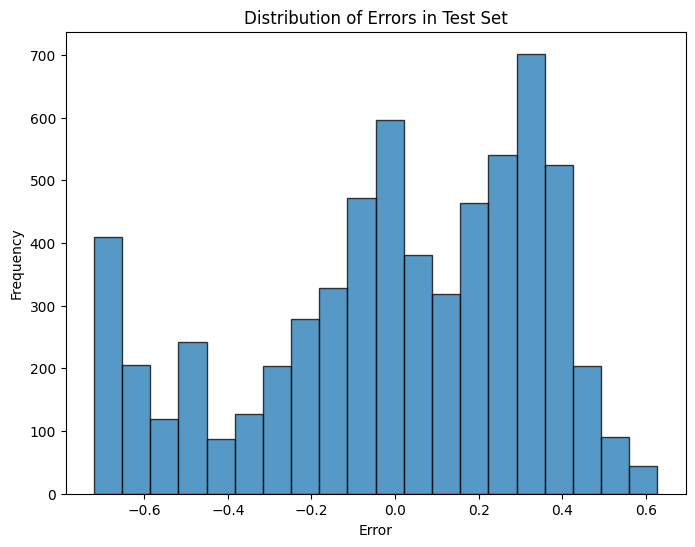

In [8]:
df = pd.read_csv('Indicator-Desc_DataNewVanPipeline.csv')
baseline(df)

In [9]:
df

,id,name,shares,wow,cares,sad,angry,haha,reactions_count,comments,...,image,post_url,like,entropy,word_count,char_count,sentence_count,avg_word_length,avg_sentence_length,avg_entropy
0,10163934331094852,RTL Nieuws,0,17,0,0,0,14,39,0,...,https://external-ams4-1.xx.fbcdn.net/emg1/v/t1...,https://www.facebook.com/rtlnieuws/posts/10163...,8,1.054665e+00,25,130,3,5.200000,8.333333,0.701124
1,pfbid02cqcq58k9w5SLa53oX3MHzdZiwHZUxYEC9a8ad7a...,RTL Nieuws,1,0,11,0,0,38,67,206,...,https://external-ams4-1.xx.fbcdn.net/emg1/v/t1...,https://www.facebook.com/rtlnieuws/posts/pfbid...,18,9.713820e-01,34,152,4,4.470588,8.500000,0.701124
2,10163934192809852,RTL Nieuws,5,12,0,0,0,21,58,284,...,https://external-ams4-1.xx.fbcdn.net/emg1/v/t1...,https://www.facebook.com/rtlnieuws/posts/10163...,25,1.056551e+00,25,118,2,4.720000,12.500000,0.701124
3,10163934158909852,RTL Nieuws,1,0,0,0,0,0,48,4,...,https://external-ams4-1.xx.fbcdn.net/emg1/v/t1...,https://www.facebook.com/rtlnieuws/posts/10163...,48,2.426238e-08,18,92,3,5.111111,6.000000,0.701124
4,10163934115229852,RTL Nieuws,4,17,0,0,0,52,106,16,...,https://external-ams4-1.xx.fbcdn.net/emg1/v/t1...,https://www.facebook.com/rtlnieuws/posts/10163...,37,1.010295e+00,21,129,2,6.142857,10.500000,0.701124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6335,pfbid0HzY3V69B9rkeEDrJiGfbjUhgj1iAgV7Y2J51zXbd...,De Telegraaf,3,0,0,0,0,47,103,169,...,https://external-ams4-1.xx.fbcdn.net/emg1/v/t1...,https://www.facebook.com/telegraaf/posts/pfbid...,56,6.893248e-01,12,76,2,6.333333,6.000000,0.708075
6336,pfbid023hQpKyewhbaryhXvZoX1gPqoDVXaQYHz6iTEwkD...,De Telegraaf,4,0,0,0,0,17,60,26,...,https://external-ams4-1.xx.fbcdn.net/emg1/v/t1...,https://www.facebook.com/telegraaf/posts/pfbid...,43,5.960740e-01,26,109,2,4.192308,13.000000,0.708075
6337,pfbid08baTHn1nbH3iCdrbNAG1DHdwArfiSFGVXL9r1bgX...,De Telegraaf,2,0,0,0,23,39,71,65,...,https://external-ams4-1.xx.fbcdn.net/emg1/v/t1...,https://www.facebook.com/telegraaf/posts/pfbid...,9,9.560561e-01,18,113,2,6.277778,9.000000,0.708075
6338,pfbid02NtGCYQ3VdJAcoWMvaSb7vvy4BdCLb1Y2d7LBEPo...,De Telegraaf,3,0,0,0,0,60,91,135,...,https://external-ams4-1.xx.fbcdn.net/emg1/v/t1...,https://www.facebook.com/telegraaf/posts/pfbid...,31,6.414719e-01,7,34,2,4.857143,3.500000,0.708075
